In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from numpy import exp,pi,sqrt

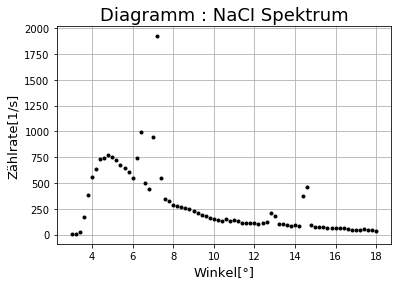

In [15]:
w=np.array([3.0,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0,5.2,5.4,5.6,5.8,6.0,6.2,6.4,6.6,6.8,
            7.0,7.2,7.4,7.6,7.8,8.0,8.2,8.4,8.6,8.8,9.0,9.2,9.4,9.6,9.8,10.0,10.2,10.4,10.6,10.8,
            11,11.2,11.4,11.6,11.8,12,12.2,12.4,12.6,12.8,13,13.2,13.4,13.6,13.8,14,14.2,14.4,14.6,14.8,
            15,15.2,15.4,15.6,15.8,16,16.2,16.4,16.6,16.8,17,17.2,17.4,17.6,17.8,18])
rate=np.array([6.2,7,20.6,166.4,384.4,556.8,633.4,735.8,738,770,753.4,725.4,671.8,642,602.6,552.2,744.4,996.4,502.8,438.6,
           950,1921.4,546.2,347.8,321.4,290.2,279.4,266.8,260.2,243.2,229.4,212,186.4,176.0,159,151,143.8,133.4,151.6,132.6,
           136.6,134.2,113.6,113.8,109.2,108.4,100.8,110.2,125.2,212.8,177.2,98,97.8,95.6,87.6,91,85.8,369,462.4,97.2,
           74.8,69,68.8,62.6,67.6,63.6,59,62.4,57.6,47.8,48.4,47.4,52.2,47.6,46.2,38.8])
#rate=rate/20

plt.plot(w, rate, linestyle='none', label='Messdaten', marker='.', color='black')

plt.xlabel('Winkel[°]', fontsize=13)
plt.ylabel('Zählrate[1/s]', fontsize=13)
plt.title('Diagramm : NaCI Spektrum', fontsize=18)
plt.grid()
plt.show()

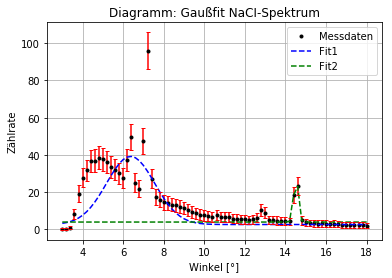

mu1= 6.366939777382205 ,Standardfehler= 0.14289814437295167
sig1= 1.1845399749289056 ,Standardfehler= 0.12249868365696663

mu2= 14.516621088155713 ,Standardfehler= 0.07663412756493204
sig2= 0.10862025600087258 ,Standardfehler= 0.12337216227527287


In [57]:
def gaussian(x,A,mu,sig,c):
    return A/(sqrt(2*pi)*sig)*exp(-(x-mu)**2/2/sig**2)+c
error_rate=np.sqrt(rate)
popt1, pcov1=curve_fit(gaussian, w, rate, p0=([95,7.2,0.2,10]), sigma=error_rate)
popt2, pcov2=curve_fit(gaussian, w, rate, p0=([22,14.6,0.2,10]), sigma=error_rate)

plt.plot(w, rate, linestyle='none', label='Messdaten', marker='.', color='black')
plt.plot(w, gaussian(w,*popt1), color='blue', linestyle='--', label='Fit1')
plt.plot(w, gaussian(w,*popt2), color='green', linestyle='--', label='Fit2')
plt.errorbar(w, rate, error_rate, linestyle='none', color='red', capsize=2)
plt.xlabel('Winkel [°]')
plt.ylabel('Zählrate')
plt.title('Diagramm: Gaußfit NaCI-Spektrum')
plt.legend()
plt.grid()
plt.show()

print("mu1=", popt1[1],",Standardfehler=", np.sqrt(pcov1[1][1]))
print("sig1=", popt1[2],",Standardfehler=", np.sqrt(pcov1[2][2]))
print('')
print("mu2=", popt2[1],",Standardfehler=", np.sqrt(pcov2[1][1]))
print("sig2=", popt2[2],",Standardfehler=", np.sqrt(pcov2[2][2]))